# HW due Feb 17

In [1]:
import seaborn as sbn
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Here is a useful list of all the functions we have been using:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.base import clone
from sklearn.linear_model import SGDRegressor

In [3]:
from sklearn.linear_model import Ridge

In [4]:
from sklearn.linear_model import Lasso

In [5]:
from sklearn.linear_model import ElasticNet

In [6]:
'''
            THIS CELL INITIALIZES A FONT DICTIONARY SO I CAN HAVE ALL THE PROPERTIES I WANT IN PLOTS WITH 1 LINE
'''

font = {
    'family': 'serif',
    'color':'white',
    'weight':'normal',
    'size':16,
}


### Now that we have learned so much more about machine learning and regression. Let's take another look at the Life Expectancy data and see if we can do a better job building the model.

In [7]:
# Import the data
URL = 'http://facweb1.redlands.edu/fac/joanna_bieri/machinelearning/LifeExpectancyData.csv'
df = pd.read_csv(URL)

### Things you should do
- Use seaborn to plot the data again and choose your features, except now you could consider features that have more of a polynomial shape if you want. Get to know the data!
- For the features that you choose, clean up the data: remove false zeros, remove NA's, and if possible remove outliers.
- Choose a model: Linear, Polynomial, Regularized, etc
- Separate your data into training and validation sets
- Train your model finding thetas and normalization parameters from the training set.
- Test your model using the validation data set. This might include plotting learning curves and comparing the error (training vs validation) of different model assumptions. At this point you might have to go back and make some different choices.


# IMPORTANT 
### For each step of this process you should BOTH comment your code expain what it is doing and add markdown cells in between code with your words in clear english saying why you are making the decisions you are making.

Make sure to rationalize ALL of the decisions you are making. A fellow student in our class should be able to open your jupyter notebook and understand all of your code, steps, and decisions without needing to ask you any questions.

- Please compare your results this time to what you did last time. How did you change your model? How did your results change?

In [8]:
# FIRST I'LL USE DESCRIBE TO GET AN UNDERSTANDING OF THE DATA
df.describe()

,Year,Life expectancy,Adult Mortality,Infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [9]:
'''
        GETTING RID OF THE STRINGS COLUMNS BEFORE USING SEABORNE HEAT MAP TO VISUALIZE CORRELATIONS 
'''
df.drop('Country', axis=1, inplace=True) # drops the country attribute 
df.drop('Year', axis=1, inplace=True) # drops the year attribute 
df.drop('Status', axis=1, inplace=True) # drops the status 

# Visualizing correlation with Seaborn
sbn.set(rc={'figure.figsize':(18,9)})
#sbn.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

## HEAT MAP INTERPRETATION:
- Adult Mortality 
- Schooling
- Income compostion of Resources
- Alchol 
- BMI
- HIV/AIDS
- Dipheria 
- Thinness 1-19

All have the strongest correlation to life expectancy

In [10]:
'''
        USING SEABORNE TO PLOT EACH FEATURE AGAINST EACH OTHER FEATURE SO I CAN SEE TRENDS  
         This should plot a different scatter plot for each pair of variables
'''

df.dropna(inplace=True)
# Plot all of the variable-to-variable relations as scatterplots
#sbn.pairplot(df,size=2.5) 


## PAIR PLOT INTERPRETATION:
- Schooling 
- Income compostion of resources 
- Adult mortality 

All have relatively linear correlations with life expectancy
<br>

- HIV
- BMI
- GDP 
- Percentage expenditure 

All have polynomial fits

The feature set I'll use is:
- Adult Mortality
- Schooling
- Income compostion of Resources
- BMI
- HIV/AIDS

In [11]:
'''     CHOOSING MY FIVE FEATURES + THE DEPENDANT VAR ( LIFE EXPECTANCY ) 
        USING .COPY TO ENSURE THE ORIGINAL DATA FRAME ISN'T ALTERED 
'''
Chosen_feature_set = df[[
    'Life expectancy ', 'Adult Mortality', 'BMI',
       'HIV/AIDS', 'Income composition of resources', 'Schooling'
]].copy()

Chosen_feature_set.dropna(inplace =True)  # DROPPING NA'S HERE TO ENSURE UNIFORMITY AMONGST FEATURES AND DEP VAR 

y = Chosen_feature_set[['Life expectancy ']].copy()  # DOUBLE BRACES BECAUSE I STILL WANT A PANDAS DATA FRAME,
# NOTE*  NEED TO USE .COPY AS WE'LL NEED TO USE LIFE EXPECTANCY LATER

'''
    DROP THE LIFE EXPECTANCY COL, 
    AXIS =1 SPECIFIES COLUMN DROP
    INPLACE = FALSE ENSURES I DONT DROP FROM CHOSEN FEATURE SET RATHER SAVE NEW VERSION INTO X 
'''
X = Chosen_feature_set.drop('Life expectancy ', axis=1,inplace=False) 



In [12]:
print(f'Shape of X: {X.shape}\nType of X: {type(X)}\n')
X.describe()  # LETS SEE WHAT KIND OF DATA WE HAVE IN THE FEATURE SET 


Shape of X: (1649, 5)
Type of X: <class 'pandas.core.frame.DataFrame'>



,Adult Mortality,BMI,HIV/AIDS,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000
mean,168.215282,38.128623,1.983869,0.631551,12.119891
std,125.310417,19.754249,6.032360,0.183089,2.795388
min,1.000000,2.000000,0.100000,0.000000,4.200000
25%,77.000000,19.500000,0.100000,0.509000,10.300000
50%,148.000000,43.700000,0.100000,0.673000,12.300000
75%,227.000000,55.800000,0.700000,0.751000,14.000000
max,723.000000,77.100000,50.600000,0.936000,20.700000


In [13]:
print(f'Shape of y: {y.shape}\nType of y: {type(y)}\n')
y.describe()  # LETS SEE WHAT KIND OF DATA WE HAVE IN THE DEPENDANT VARIABLE

Shape of y: (1649, 1)
Type of y: <class 'pandas.core.frame.DataFrame'>



,Life expectancy
count,1649.000000
mean,69.302304
std,8.796834
min,44.000000
25%,64.400000
50%,71.700000
75%,75.000000
max,89.000000


### Now that I have my features ill use the pair plot again to get a good visual of the relationships between my features and the life expectancy 

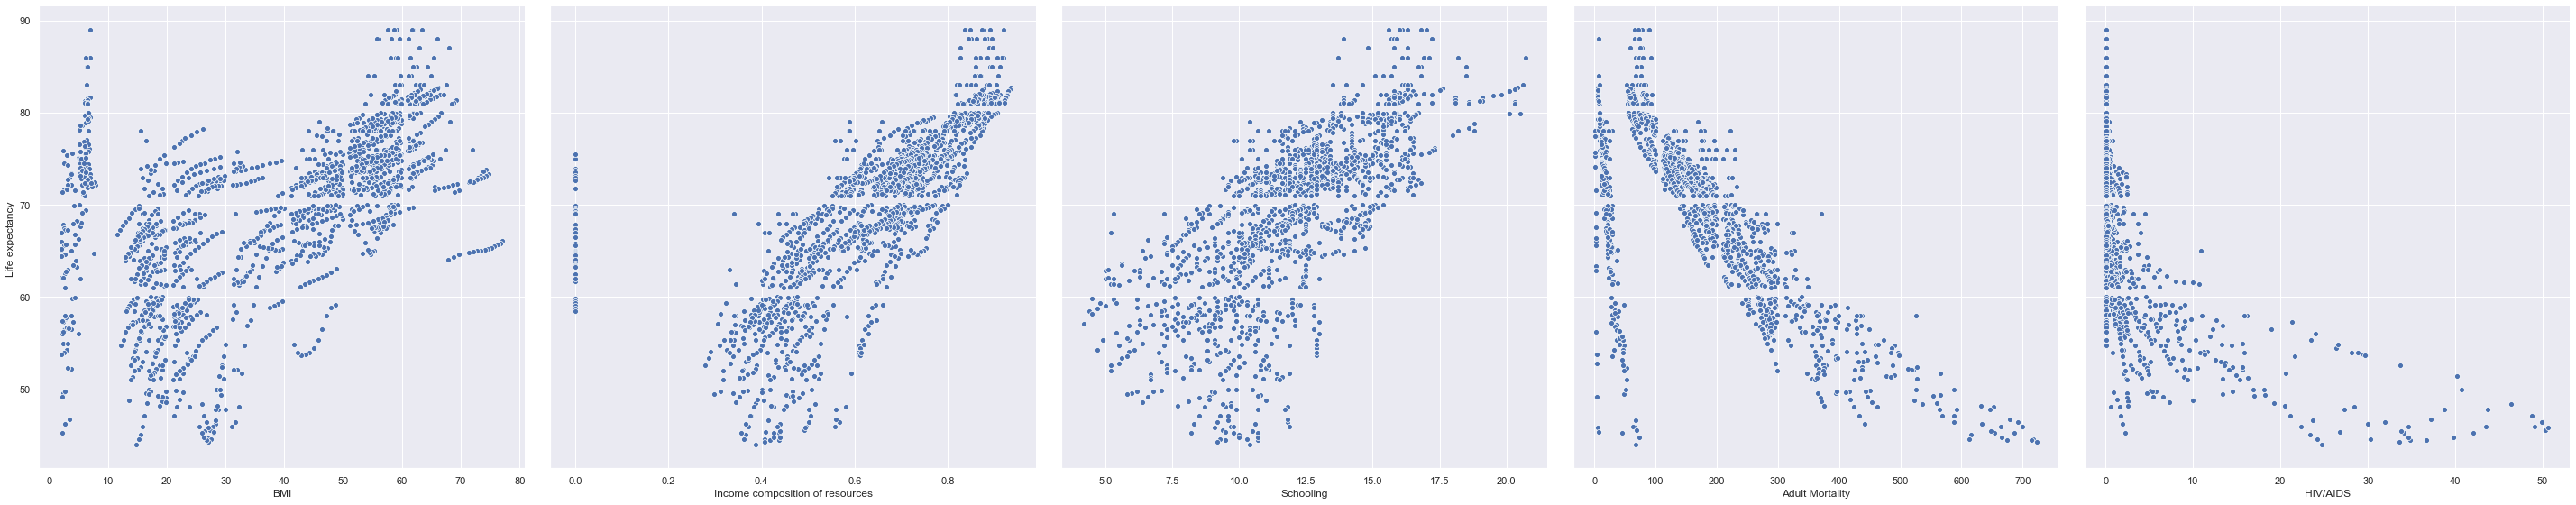

In [14]:
'''
        IN THIS CELL ILL USE PAIR PLOT TO PLOT EACH FEATURE AGAINST LIFE EXPECTANCY
        AMD LOOK FOR OUTLIERS AND DETERMINE IF REGULARIZATION IS NEEDED AS WELL AS 
        ENSURE THAT THE FEATURES HAVE 'PLOTTABLE' TRENDS 
'''

sbn.pairplot(data=Chosen_feature_set,
                  x_vars=[ 'BMI', 'Income composition of resources', 'Schooling','Adult Mortality','HIV/AIDS'],
                  y_vars=['Life expectancy '],height=8)


## Feature plots analysis
From the plots I can see that BMI, Income composition and Adult Mortality have many points that deviate from the trends
and therefore Regularisation will need to be inplemented.


In [15]:
'''
            IN THIS CELL I CONVERT MY X AND y INTO NUMPY ARRAYS IN ORDER TO USE TRAIN_TEST_SPLIT
            RESHAPE THEM TO THE SIZES I WANT TO AVOID 'BY NOTHING' ERRORS
            I THEN USE TRAIN_TEST_SPLIT TO SEPARATE MY DATA INTO TRAINING AND VALIDATION (TESTING) DATA
'''

X= X.to_numpy().reshape(-1,5) # HOWEVER MANY ROWS AS NECESSARY BY 5IVE COLUMNS FOR 5 FEATURES 
y= y.to_numpy().reshape(-1,1) # HOWEVER MANY ROWS BY 1 COLUMN FOR THE DEPENDANT VAR  

'''
     # .2 SPECIFIES 20% TESTING 80% FOR TRAINING
     RANDOM STATE ENSURES UNIFORMITY WHEN TRAINING AND COMPARING WITH OTHERS 
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
'''
        IN THIS CELL I WIL CONSTRUCT A FUNCTION THAT WILL NORMALIZE, REGULARIZE, FIT AND TRANSFORM THE DATA
        AS WELL AS PLOT THE RMSE FOR THE TRAINING AND TESTING DATA VS DEGREE OF POLYNOMIAL 
        
        THE REGRESSION TYPE I'LL BE USING IS POLYNOMIAL REGRESSION (POLY FEATURES)
        THE NORMALIZATION I WILL USE IS STANDARD SCALAR 
        THE REGULARISATION I'LL BE USING WILL BE AN ARGUMENT THAT CAN BE CHANGED UPON METHOD CALL
    
'''

def plot_model(reg,degree_polynomial):
    
    # Define all the functions you want to apply
    regularisation = reg
    scale = StandardScaler()
    
    
    training_errors, testing_errors= [], []# LIST TO CONTAIN ALL THE RMSE FOR PREDICTIONS VS ACTUAL

    
    for d in range(1,degree_polynomial):
        ''' THIS WILL ANALYZE THE RMSE FOR ACTUAL VS PREDICTION FOR DEGREES 1-20 IN THE POLY REGRESSION
            AND APPEND EACH TO THE LISTS ABOVE 
        '''
        poly_features = PolynomialFeatures(degree=d, include_bias=False)
        # Define the regression using the pipeline
        polynomial_regression = Pipeline([
                    ("poly_features", poly_features),
                    ("scale", scale),
                    ("regularisation", regularisation),
                ])
        
        polynomial_regression.fit(X_train, y_train)  # train the model with X and y training data 
        
        y_training_predictions = polynomial_regression.predict(X_train) # models predictions for the training features
        y_validation_predictions = polynomial_regression.predict(X_test)  # models predictions for the testing features
        
        # MSE OF ACTUAL Y VALUES IN TRAINING DATA VS PREDICTION 
        training_errors.append( mean_squared_error(y_train, y_training_predictions))
        
        # MSE OF ACTUAL Y VALUES IN TESTING DATA VS PREDICTION 
        testing_errors.append( mean_squared_error(y_test, y_validation_predictions) )
    
    '''THIS WILL PLOT THE ERRORS VS THE DEGREE OF POLYNOMIAL'''
    
       
    plt.plot(np.sqrt(training_errors), "r-+", linewidth=1, label="training data")  # PLOT THE ERRORS IN TRAINING DATA
    plt.plot(np.sqrt(testing_errors), "b-", linewidth=3, label="testing data")  # PLOT THE ERRORS IN TESTING  DATA
    plt.legend(loc="upper right", fontsize=14)  
    plt.xlabel("Degree of Polynomial", fontdict=font) 
    plt.ylabel("RMSE", fontdict=font)   
    plt.title(f'Regularisation: {reg}')
    plt.show() 

C:\Users\Raf\Anaconda3\envs\Machine Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.26132582982973, tolerance: 10.39341699772555
  positive)
C:\Users\Raf\Anaconda3\envs\Machine Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62.13111188082257, tolerance: 10.39341699772555
  positive)
C:\Users\Raf\Anaconda3\envs\Machine Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78.83957044884664, tolerance: 10.39341699772555
  positive)
C:\Users\Raf\Anaconda3\envs\Machine Learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective 

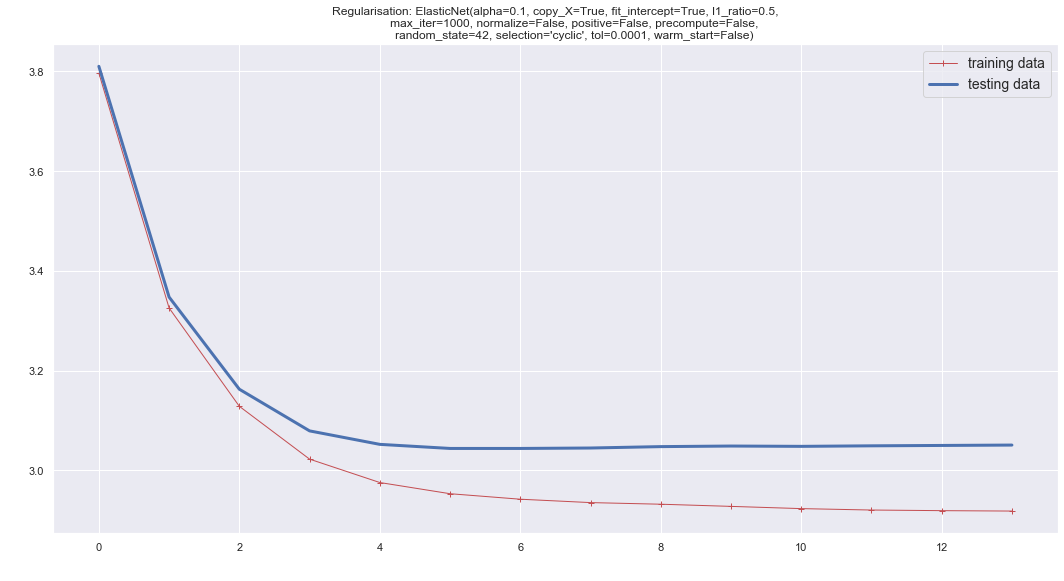

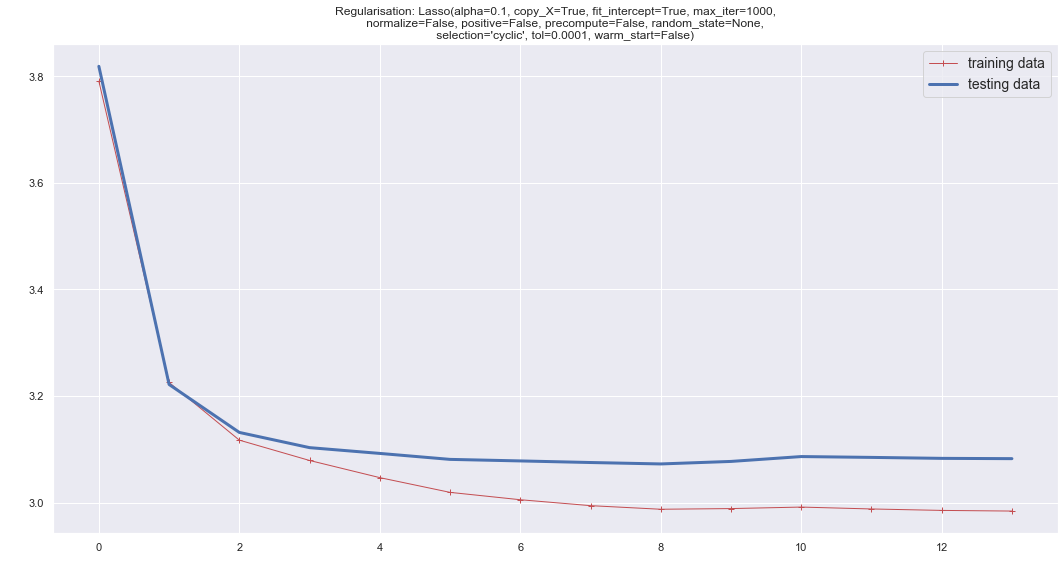

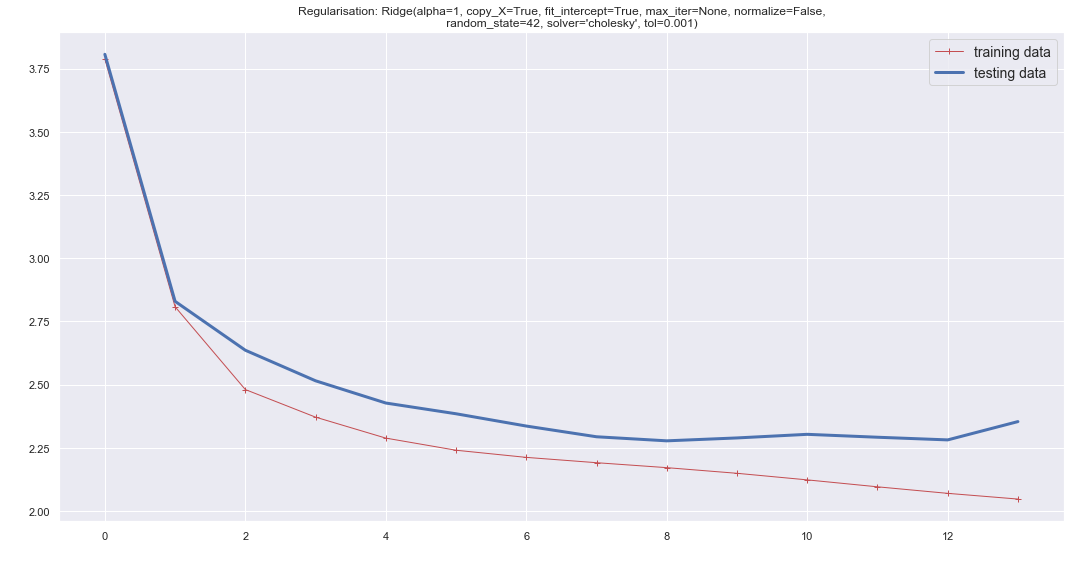

In [17]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)  # TESTING USING ELASTIC NET REGFULARISATION 
lasso_reg = Lasso(alpha=0.1) # TESTING USING LASSO REGULARISATION 
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)  # TESTING USING RIDGE REGULARISATION 

plot_model(elastic_net,13)
plot_model(lasso_reg,13)
plot_model(ridge_reg,13)

## INTERPRETATION 

#### Elastic Net Regularisation:
- There is diminishing returns computing models with a degree greater than 5
- The RMSE for Training and Testing predictions diverge as degree gets larger 
- The RMSE for the Testing data remains constant for degree > 5 


#### Lasso Regularisation:
- There is diminishing returns computing models with a degree greater than 5
- The RMSE for Training and Testing predictions diverge as degree gets larger but slower than Elastic Net
- The RMSE for the Testing data is more volatile than Elastic Net and starts to increase at degree > 8

#### Ridge Regularisation:
- There is diminishing returns computing models with a degree greater than 7
- The RMSE for Training and Testing predictions diverge wildly as degree gets larger than 8
- The RMSE for the Testing data is more volatile than both Elastic Net and Lasso and starts to increase rapidly  at degree > 12


<span style="color:red"> Note*</span> All Models failed to compute with Degree>12

### Finally:
The model with the lowest RMSE for the Testing and Validation data was Ridge Regularisation using polynomial Regression
The Degree of poynomial is best kept between 7 and 10. 
